**Welcome to Credit Score Classification Python jypter Notebook**

**In today's financial landscape, credit scores play a pivotal role in assessing an individual's creditworthiness. Lenders, ranging from traditional banks to online lending platforms, heavily rely on credit scores to make informed decisions about extending credit. As the demand for credit continues to rise, the need for accurate and efficient credit score classification becomes paramount. Machine learning techniques offer a powerful toolset for analyzing vast amounts of financial data to predict and classify credit scores.**

**Building an effective credit scoring model to assess individual creditworthiness involves several key steps, from data preprocessing and feature engineering to model selection and evaluation. The process begins with collecting historical financial data, including transaction history, loan payments, credit history, income levels, and personal information, followed by data cleaning to handle missing values and inconsistencies. Next, data transformation techniques like standardization for numerical features and one-hot encoding for categorical data are applied. Feature engineering can add derived metrics such as credit utilization rate and payment history to enrich the dataset. Various machine learning algorithms, including Logistic Regression, Decision Trees, Random Forests, Gradient Boosting Machines (e.g., XGBoost, LightGBM), Support Vector Machines, are then tested to classify creditworthiness, with hyperparameter tuning used to optimize performance. Model evaluation uses accuracy, precision, recall, F1-score, to assess the model’s reliability and effectiveness, ultimately aiming to create an accurate, interpretable, and efficient credit scoring system that enhances credit risk assessment practices**


**Column Descriptions:**

| Column Name | Description |
|-------------|-------------|
| `Customer_ID`        | Unique identifier for each customer |
| `Month`       | The month for which the financial data is recorded |
| `Name`       | Name of the individual |
| `Age`        | Age of the individual |
| `SSN`    | Social Security Number, a unique identifier for individuals in the U.S. |
| `Occupation`  | The occupation or profession of the indivivdual |
| `Annual_Income`| Serum cholesterol in mg/dl |
| `Monthly_Inland_Salary`| If fasting blood sugar > 120 mg/dl (True/False) |
| `Num_Bank_Accounts`| Number of bank accounts held by the individual |
| `Num_Credit_Card`| Number of credit cards owned by the individual |
| `Interest_Rate` | Interest rate associated with financial transactions |
| `Num_of_Loan`   | Number of loans the individual has |
| `Type_of_Loan`     | The type of loan(s) the individual has |
| `Delay_from_due_date`   | Delay in payments from the due date |
| `Num_of_Delayed_Payment`      | Number of delayed payments |
| `Changed_Credit_LImit`       | Whether there has been a change in credit limit |
| `Num_Credit_Inquiries`       | Number of credit inquiries made |
| `Credit_Mix`       | The mix of different types of credit |
| `Outstanding_Debt`       | Amount of outstanding debt |
| `Credit_Utilization_Ratio`       | Ratio of credit used to the total credit available. |
| `Credit_History_Age`       | Age of credit history |
| `Payment_of_Min_Amount`       | Payment behavior regarding the minimum amount due |
| `Total_EMI_per_month`       | Total Equated Monthly Installment (EMI) payments |
| `Amount_invested_monthly`       | Amount invested by the individual monthly |
| `Payment_Behaviour`       | Behavior related to payment patterns |
| `Monthly_Balance` | Monthly balance in the account |
| `Credit_Score` | The credit score assigned to the individual based on various factors. |


In [69]:
#Library for data analysis
import numpy as np
import pandas as pd 

# Library for data visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# Library for Preprocessing 
from sklearn.preprocessing import LabelEncoder

# Library for model selection and splitting the dataset
from sklearn.model_selection import train_test_split, cross_val_score


# Library for Classification Algorithms
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

#Library for evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv(r'C:\Users\user\Desktop\Github/train.csv')

df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_25736\4236226813.py:30: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\user\Desktop\Github/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [70]:
print('Train Data Size : ',df.shape)

Train Data Size :  (100000, 28)


In [71]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [73]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [74]:
# Drop unnecessary columns
df.drop(["ID","Customer_ID","Name","SSN","Type_of_Loan","Credit_History_Age"],axis=1,inplace=True)

In [75]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

**Among the different features it consiist of categorical features as well as numerical features, so categorical features must also be converted to numerical in order to fill the missing data.**

In [76]:
## Finding the numerical and categorical columns
cat_cols = [feature for feature in df.columns if df[feature].dtypes == 'O']
num_cols = [feature for feature in df.columns if feature not in cat_cols]
print(cat_cols)
print(num_cols)

['Month', 'Age', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']
['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']


In [77]:
## Finding the unique values in each of the categorical feature columns
for feature in cat_cols:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {df[feature].nunique()}")
    print(f"Unique values: {df[feature].unique()}")
    print('\n')

Month:
Number of unique values in the Month: 8
Unique values: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


Age:
Number of unique values in the Age: 1788
Unique values: ['23' '-500' '28_' ... '4808_' '2263' '1342']


Occupation:
Number of unique values in the Occupation: 16
Unique values: ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']


Annual_Income:
Number of unique values in the Annual_Income: 18940
Unique values: ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']


Num_of_Loan:
Number of unique values in the Num_of_Loan: 434
Unique values: ['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1

In [78]:
df.drop(df[df["Occupation"]=='_______'].index,inplace=True)
df.drop(df[df["Credit_Mix"]=='_'].index,inplace=True)

In [79]:
df["Month"].value_counts()

Month
July        9377
January     9341
March       9325
June        9295
April       9237
February    9210
August      9198
May         9181
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_25736\2640038376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Month",data=df,palette="viridis")


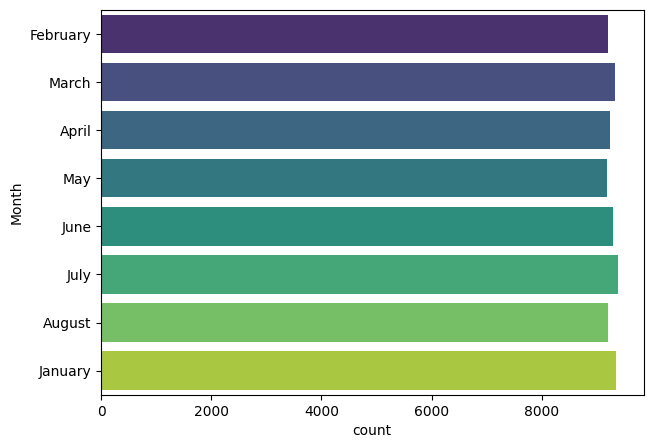

In [80]:
plt.figure(figsize=(7,5))
sns.countplot(y="Month",data=df,palette="viridis")
plt.show()

In [81]:
month_mapping = {
   'January': 1,
    'February': 2,
    'March': 3,
    "April":4,
    "May":5,
    "June":6,
    "July":7,
    "August":8}
df['Month'] = df['Month'].replace(month_mapping)

C:\Users\user\AppData\Local\Temp\ipykernel_25736\2750087208.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Month'] = df['Month'].replace(month_mapping)


In [82]:
df["Occupation"].value_counts()

Occupation
Lawyer           5259
Engineer         5077
Architect        5073
Scientist        5052
Accountant       5042
Mechanic         5001
Media_Manager    4978
Developer        4967
Teacher          4930
Entrepreneur     4911
Journalist       4884
Doctor           4860
Manager          4756
Musician         4702
Writer           4672
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_25736\4266829713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Occupation",data=df,palette="Set1")


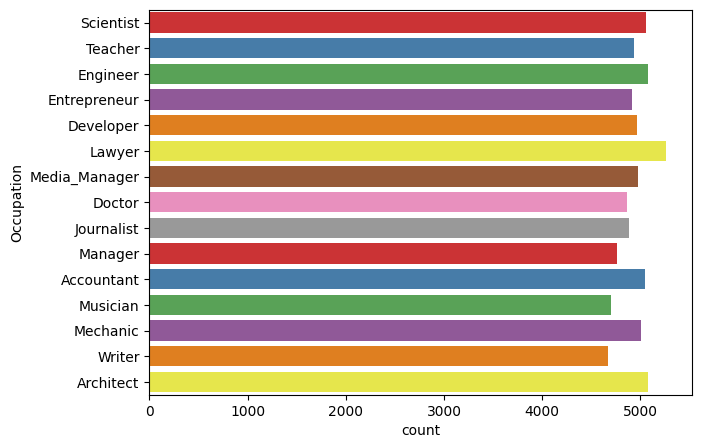

In [83]:
plt.figure(figsize=(7,5))
sns.countplot(y="Occupation",data=df,palette="Set1")
plt.show()

In [84]:
occupation_mapping = {
    'Lawyer': 1,
    'Architect': 2,
    'Engineer': 3,
    'Scientist': 4,
    'Mechanic': 5,
    'Accountant': 6,
    'Developer': 7,
    'Media_Manager': 8,
    'Teacher': 9,
    'Entrepreneur': 10,
    'Doctor': 11,
    'Journalist': 12,
    'Manager': 13,
    'Musician': 14,
    'Writer': 15
}

df['Occupation'] = df['Occupation'].replace(occupation_mapping)

C:\Users\user\AppData\Local\Temp\ipykernel_25736\1151649544.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Occupation'] = df['Occupation'].replace(occupation_mapping)


C:\Users\user\AppData\Local\Temp\ipykernel_25736\4049969739.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Credit_Mix",data=df,palette="magma")


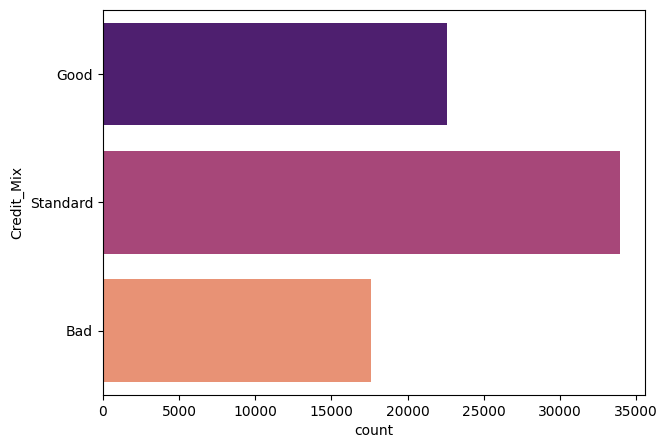

In [85]:
df["Credit_Mix"].value_counts()
plt.figure(figsize=(7,5))
sns.countplot(y="Credit_Mix",data=df,palette="magma")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_25736\2176498722.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Credit_Mix",data=df,palette="magma")


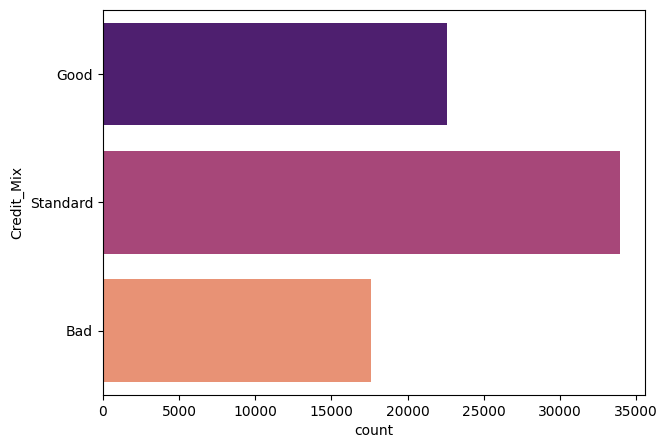

In [86]:
plt.figure(figsize=(7,5))
sns.countplot(y="Credit_Mix",data=df,palette="magma")
plt.show()

In [87]:
credit_map={"Good":1,"Standard":2,"Bad":3}
df['Credit_Mix'] = df['Credit_Mix'].replace(credit_map)

C:\Users\user\AppData\Local\Temp\ipykernel_25736\351056498.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Credit_Mix'] = df['Credit_Mix'].replace(credit_map)


In [88]:
df["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      18866
High_spent_Medium_value_payments    13075
Low_spent_Medium_value_payments     10304
High_spent_Large_value_payments     10191
High_spent_Small_value_payments      8341
Low_spent_Large_value_payments       7711
!@9#%8                               5676
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_25736\180050450.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Payment_Behaviour",data=df,palette="magma")


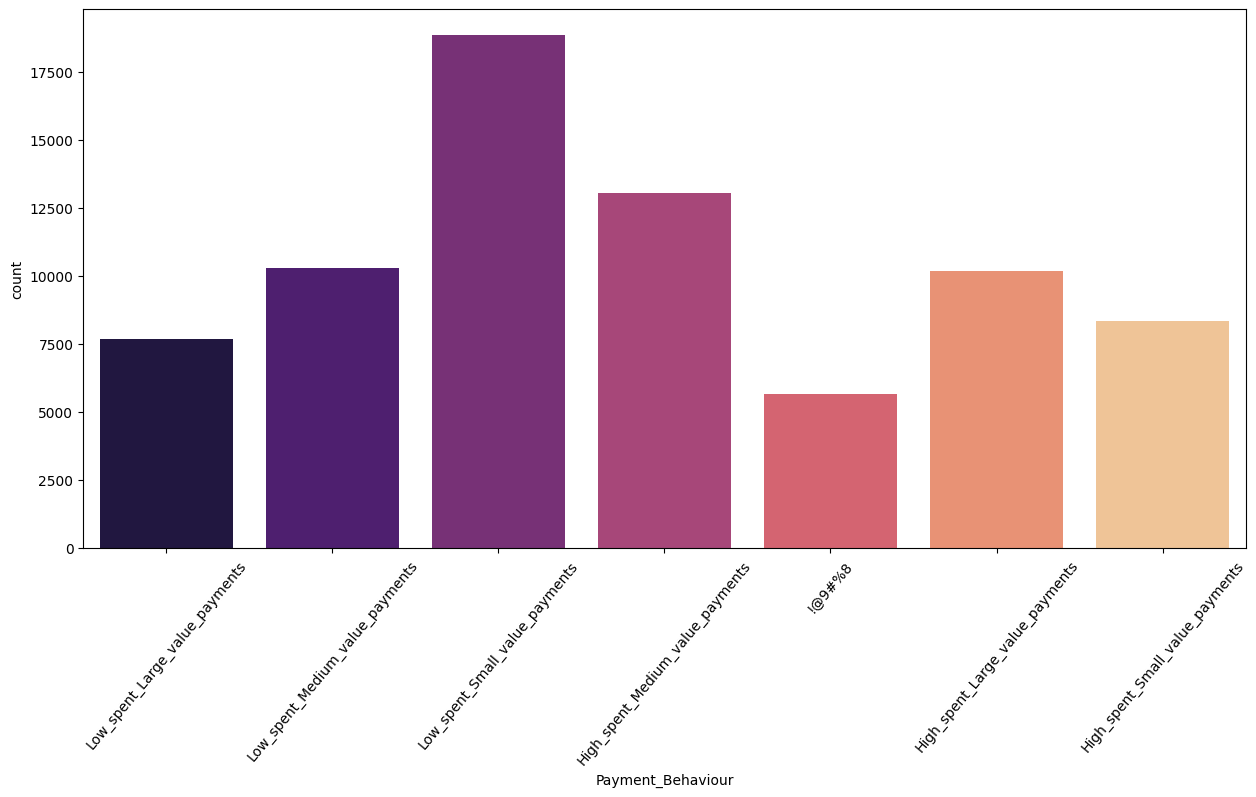

In [89]:
plt.figure(figsize=(15,7))
sns.countplot(x="Payment_Behaviour",data=df,palette="magma")
plt.xticks(rotation=50)
plt.show()

In [90]:
df['Payment_Behaviour']= df['Payment_Behaviour'].replace("!@9#%8",np.nan)

In [91]:
category_mapping = {
    'Low_spent_Small_value_payments':1,
    'High_spent_Medium_value_payments':2,
    'Low_spent_Medium_value_payments': 3,
    'High_spent_Large_value_payments': 4,
    'High_spent_Small_value_payments': 5,
    'Low_spent_Large_value_payments': 6
}
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace(category_mapping)

C:\Users\user\AppData\Local\Temp\ipykernel_25736\1963933682.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Payment_Behaviour'] = df['Payment_Behaviour'].replace(category_mapping)


In [92]:
df["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes    38737
No     26501
NM      8926
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_25736\2948456695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Payment_of_Min_Amount",data=df,palette="spring")


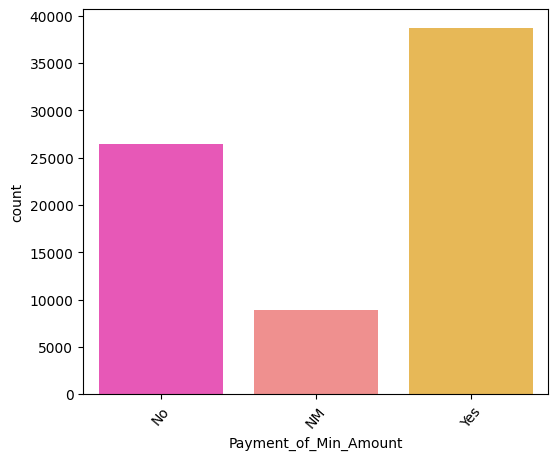

In [93]:
plt.figure(figsize=(6,5))
sns.countplot(x="Payment_of_Min_Amount",data=df,palette="spring")
plt.xticks(rotation=50)
plt.show()

In [94]:
pay_map={"Yes":1,"No":2,"NM":3}
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(pay_map)

C:\Users\user\AppData\Local\Temp\ipykernel_25736\1056793854.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(pay_map)


In [95]:
df["Credit_Score"].value_counts()

Credit_Score
Standard    39441
Poor        21509
Good        13214
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_25736\118268149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_Score",data=df,palette="hot")


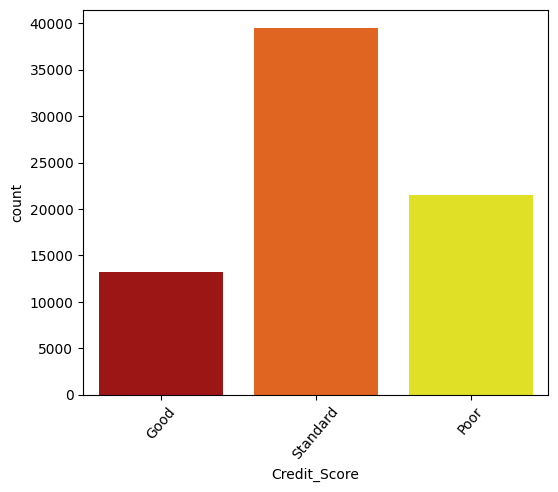

In [96]:
plt.figure(figsize=(6,5))
sns.countplot(x="Credit_Score",data=df,palette="hot")
plt.xticks(rotation=50)
plt.show()

In [97]:
score_map={"Standard":0,"Poor":1,"Good":2}
df['Credit_Score'] = df['Credit_Score'].replace(score_map)

C:\Users\user\AppData\Local\Temp\ipykernel_25736\2101071200.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Credit_Score'] = df['Credit_Score'].replace(score_map)


In [98]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       11112
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       5195
Changed_Credit_Limit            0
Num_Credit_Inquiries         1472
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3356
Payment_Behaviour            5676
Monthly_Balance               906
Credit_Score                    0
dtype: int64

In [112]:
mean_salary = df["Monthly_Inhand_Salary"].mean()
df["Monthly_Inhand_Salary"].fillna(mean_salary, inplace=True)
df["Amount_invested_monthly"] = pd.to_numeric(df["Amount_invested_monthly"], errors="coerce")
invest_mean=df["Amount_invested_monthly"].mean()
df["Amount_invested_monthly"].fillna(invest_mean, inplace=True)
df["Num_of_Delayed_Payment"] = pd.to_numeric(df["Num_of_Delayed_Payment"], errors="coerce")
n_mean=df["Num_of_Delayed_Payment"].mean()
df["Num_of_Delayed_Payment"].fillna(n_mean, inplace=True)
in_mean=df["Num_Credit_Inquiries"].mean()
df["Num_Credit_Inquiries"].fillna(in_mean, inplace=True)
df.dropna(subset=["Payment_Behaviour"], inplace=True)
df["Monthly_Balance"] = pd.to_numeric(df["Monthly_Balance"], errors="coerce")
month_mean=df["Monthly_Balance"].mean()
df["Monthly_Balance"].fillna(month_mean, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_25736\2599196418.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Monthly_Inhand_Salary"].fillna(mean_salary, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_25736\2599196418.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [113]:
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [122]:
df["Annual_Income"] = pd.to_numeric(df["Annual_Income"], errors="coerce")
an_mean=df["Annual_Income"].mean()
df["Annual_Income"].fillna(an_mean, inplace=True)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_',np.nan)  # Replace '_' with 0
df["Changed_Credit_Limit"] = pd.to_numeric(df["Changed_Credit_Limit"], errors="coerce")
c_mean=df["Changed_Credit_Limit"].mean()
df["Changed_Credit_Limit"].fillna(c_mean, inplace=True)
df['Age'] = df['Age'].replace('-500',np.nan)
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
age_mean=df["Age"].mean()
df["Age"].fillna(age_mean, inplace=True)
df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"], errors="coerce")
num_mean=df["Num_of_Loan"].mean()
df["Num_of_Loan"].fillna(num_mean, inplace=True)
df['Delay_from_due_date'] = df['Delay_from_due_date'].abs()


C:\Users\user\AppData\Local\Temp\ipykernel_25736\2720692286.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Annual_Income"].fillna(an_mean, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_25736\2720692286.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

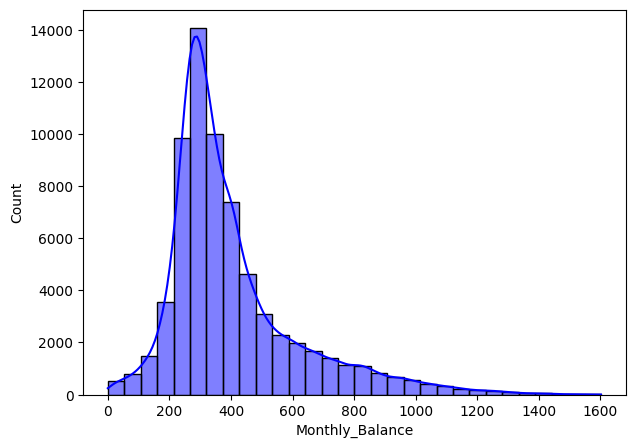

In [123]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Monthly_Balance", kde=True,bins=30,color="blue")
plt.show()

In [125]:
# Columns to scale
columns_to_scale = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt',
                    'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

# Remove non-numeric characters and convert to float
for column in columns_to_scale:
    df[column] = pd.to_numeric(df[column].astype(str).str.replace(r'[^0-9.]', ''), errors='coerce')

# Fill NaN values with the column mean, if any remain after conversion
for column in columns_to_scale:
    df[column].fillna(df[column].mean(), inplace=True)

# Scale the columns
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

C:\Users\user\AppData\Local\Temp\ipykernel_25736\3922689018.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [126]:
x=df.drop("Credit_Score",axis=1)
y=df["Credit_Score"]

In [128]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

KNeighborsClassifier Accuracy Score: 0.67


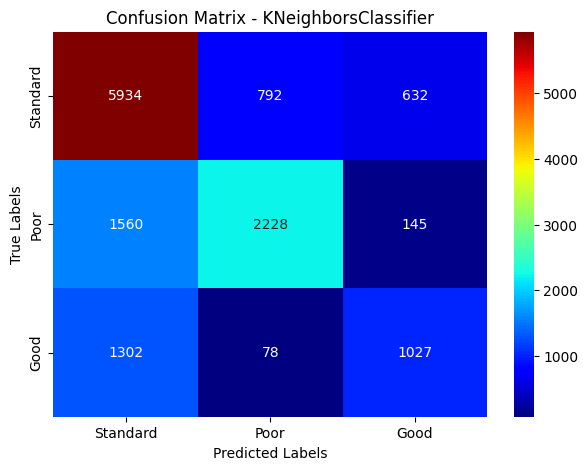


Classification Report for KNeighborsClassifier:

              precision    recall  f1-score   support

    Standard       0.67      0.81      0.73      7358
        Poor       0.72      0.57      0.63      3933
        Good       0.57      0.43      0.49      2407

    accuracy                           0.67     13698
   macro avg       0.65      0.60      0.62     13698
weighted avg       0.67      0.67      0.66     13698

GaussianNB Accuracy Score: 0.61


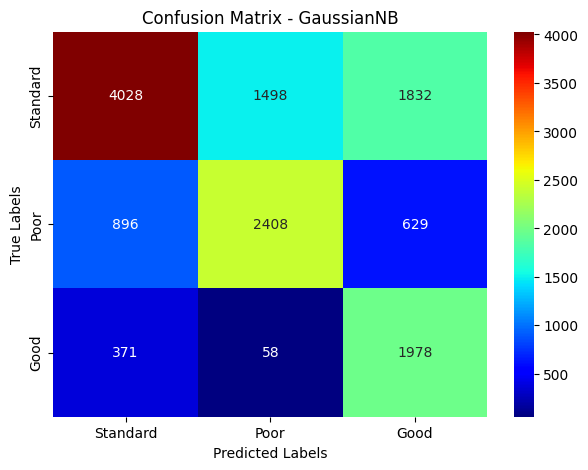


Classification Report for GaussianNB:

              precision    recall  f1-score   support

    Standard       0.76      0.55      0.64      7358
        Poor       0.61      0.61      0.61      3933
        Good       0.45      0.82      0.58      2407

    accuracy                           0.61     13698
   macro avg       0.60      0.66      0.61     13698
weighted avg       0.66      0.61      0.62     13698

SVC Accuracy Score: 0.59


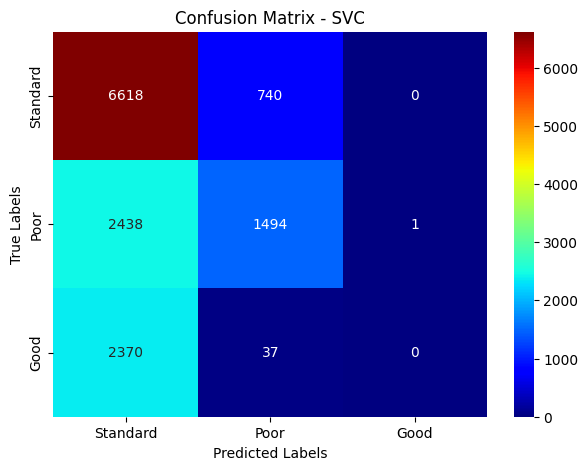


Classification Report for SVC:

              precision    recall  f1-score   support

    Standard       0.58      0.90      0.70      7358
        Poor       0.66      0.38      0.48      3933
        Good       0.00      0.00      0.00      2407

    accuracy                           0.59     13698
   macro avg       0.41      0.43      0.40     13698
weighted avg       0.50      0.59      0.52     13698

DecisionTreeClassifier Accuracy Score: 0.69


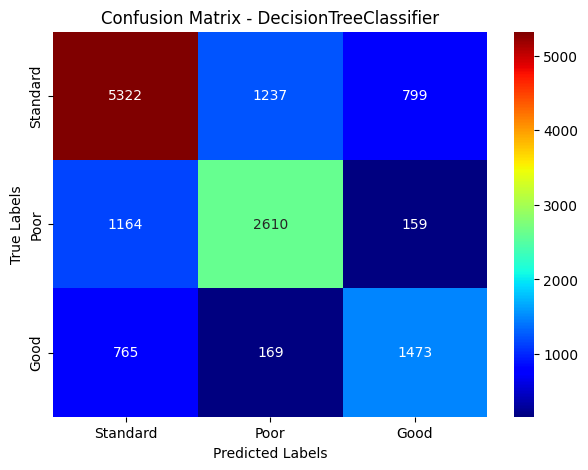


Classification Report for DecisionTreeClassifier:

              precision    recall  f1-score   support

    Standard       0.73      0.72      0.73      7358
        Poor       0.65      0.66      0.66      3933
        Good       0.61      0.61      0.61      2407

    accuracy                           0.69     13698
   macro avg       0.66      0.67      0.66     13698
weighted avg       0.69      0.69      0.69     13698

LogisticRegression Accuracy Score: 0.59


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


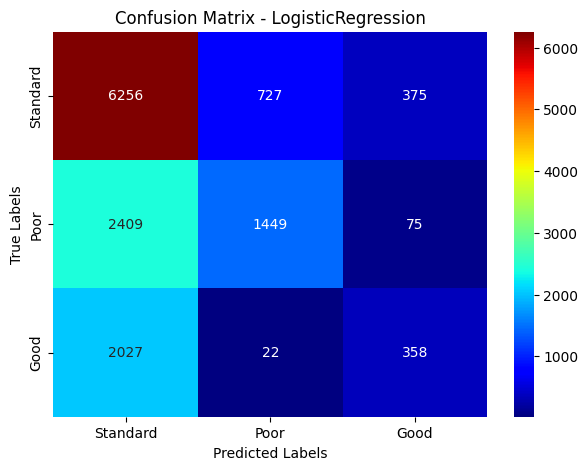


Classification Report for LogisticRegression:

              precision    recall  f1-score   support

    Standard       0.59      0.85      0.69      7358
        Poor       0.66      0.37      0.47      3933
        Good       0.44      0.15      0.22      2407

    accuracy                           0.59     13698
   macro avg       0.56      0.46      0.46     13698
weighted avg       0.58      0.59      0.55     13698

RandomForestClassifier Accuracy Score: 0.78


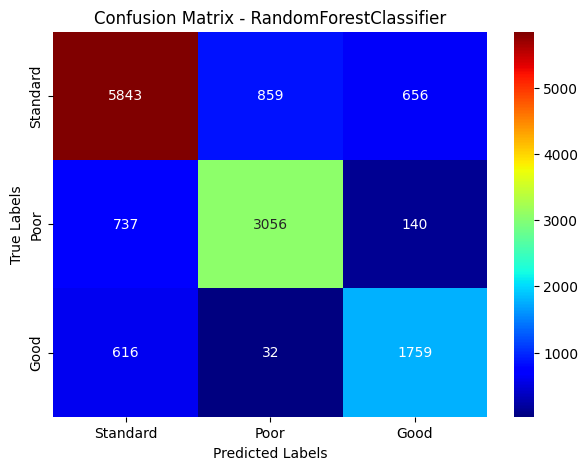


Classification Report for RandomForestClassifier:

              precision    recall  f1-score   support

    Standard       0.81      0.79      0.80      7358
        Poor       0.77      0.78      0.78      3933
        Good       0.69      0.73      0.71      2407

    accuracy                           0.78     13698
   macro avg       0.76      0.77      0.76     13698
weighted avg       0.78      0.78      0.78     13698

XGBClassifier Accuracy Score: 0.71


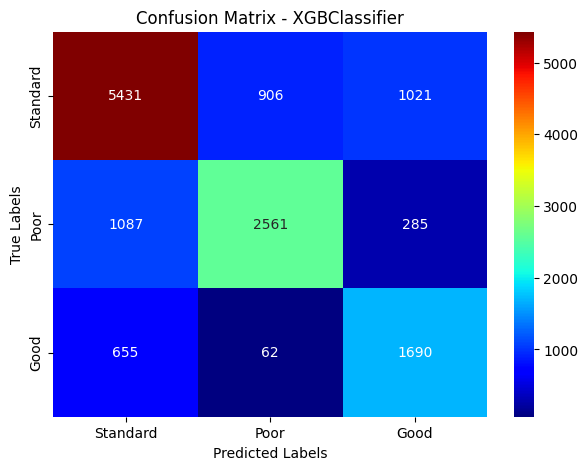


Classification Report for XGBClassifier:

              precision    recall  f1-score   support

    Standard       0.76      0.74      0.75      7358
        Poor       0.73      0.65      0.69      3933
        Good       0.56      0.70      0.63      2407

    accuracy                           0.71     13698
   macro avg       0.68      0.70      0.69     13698
weighted avg       0.71      0.71      0.71     13698

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3758
[LightGBM] [Info] Number of data points in the train set: 54790, number of used features: 21
[LightGBM] [Info] Start training from score -0.633113
[LightGBM] [Info] Start training from score -1.235680
[LightGBM] [Info] Start training from score -1.723577
LGBMClassifier Accuracy Score: 0.73


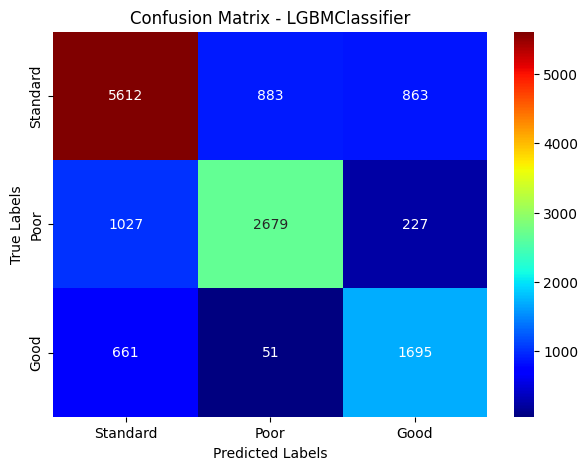


Classification Report for LGBMClassifier:

              precision    recall  f1-score   support

    Standard       0.77      0.76      0.77      7358
        Poor       0.74      0.68      0.71      3933
        Good       0.61      0.70      0.65      2407

    accuracy                           0.73     13698
   macro avg       0.71      0.72      0.71     13698
weighted avg       0.73      0.73      0.73     13698



In [129]:
# Dictionary of models to iterate over
models = {
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=8),
    "GaussianNB": GaussianNB(),
    "SVC": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=200),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100),
    "XGBClassifier": XGBClassifier(
        max_depth=3,
        learning_rate=0.1,
        n_estimators=100,
        eval_metric='logloss',
        objective='binary:logistic',
        booster='gbtree'
    ),
    "LGBMClassifier": LGBMClassifier()
}

# Labels for confusion matrix
label_names = ["Standard", "Poor", "Good"]

# Loop over each model, train it, make predictions, and evaluate
for model_name, model in models.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    
    # Make predictions
    pred = model.predict(xtest)
    
    # Calculate accuracy
    accuracy = accuracy_score(ytest, pred)
    print(f"{model_name} Accuracy Score: {accuracy:.2f}")
    
    # Generate and display confusion matrix
    cf_mat = confusion_matrix(ytest, pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cf_mat, annot=True, fmt="d", xticklabels=label_names, yticklabels=label_names, cmap="jet")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    
    # Display classification report for detailed metrics
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(ytest, pred, target_names=label_names))
    print("="*50)